In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#network and training parameters:
BATCH_SIZE = 128
VERBOSE = 1 #no idea what this is but lets see...
VAL_SPLIT = 0.2  #how much of sample is reserved for validation

In [51]:
Xtrain=np.loadtxt('training_data/Xtrain_no_npl.csv',delimiter=',')
Ytrain=np.loadtxt('training_data/Ytrain_no_npl.csv',delimiter=',')
Xtest=np.loadtxt('training_data/Xtest_no_npl.csv',delimiter=',')
Ytest=np.loadtxt('training_data/Ytest_no_npl.csv',delimiter=',')
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)

(4000, 2000) (4000, 2) (200, 2000) (200, 2)


In [53]:
Xtrain2=np.loadtxt('training_data/Xtrain_no_fps.csv',delimiter=',')
Ytrain2=np.loadtxt('training_data/Ytrain_no_fps.csv',delimiter=',')
Xtest2=np.loadtxt('training_data/Xtest_no_fps.csv',delimiter=',')
Ytest2=np.loadtxt('training_data/Ytest_no_fps.csv',delimiter=',')
print(Xtrain2.shape,Ytrain2.shape,Xtest2.shape,Ytest2.shape)

(4000, 2000) (4000, 2) (200, 2000) (200, 2)


In [76]:
#got the training set ... now write the neural net
#buid the model
#SGD stochastic gradient descent... 
DROPOUT=0.3
IP=4000
TEST=200
np.random.seed(11223)

arr=np.arange(0,IP,1)
np.random.shuffle(arr)
Xtrain=[Xtrain[i] for i in arr]
Ytrain=[Ytrain[i] for i in arr]

arr=np.arange(0,TEST,1)
np.random.shuffle(arr)
Xtest=[Xtest[i] for i in arr]
Ytest=[Ytest[i] for i in arr]

#kernel_size = 5
#kernel = np.ones(kernel_size) / kernel_size
#Xtrain = [np.convolve(Xtrain[i], kernel, mode='same') for i in range(IP)]
#Xtest = [np.convolve(Xtest[i], kernel, mode='same') for i in range(TEST)]
#Xtrain_new=np.array(Xtrain).reshape(5700,500,4)
#print(Xtrain_new.shape)

ip = keras.layers.Input(shape=(2000,),name='Input')
x=keras.layers.Dense(256,name='dense_layer_1',activation='relu')(ip)
x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(128,name='dense_layer_2',activation='relu')(ip)
x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(64,name='dense_layer_3',activation='relu')(x)
x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(32,name='dense_layer_4',activation='relu')(x)
x=keras.layers.Dropout(0.2)(x)
op=keras.layers.Dense(2,name='dense_layer_5',activation='softmax')(x)
convNN = keras.Model(inputs=ip, outputs=op,name='Convolutional_NN')
#add hidden layers
#conv_ip = keras.layers.Input(shape=(2000,),name='Input')
#x=keras.layers.Reshape((2000, 1), input_shape=(2000,),name='reshape_1')(conv_ip)
#x=keras.layers.BatchNormalization()(x)
#x=keras.layers.Conv1D(16,kernel_size=5,strides=2,activation='relu',name='conv16_5')(x) 
#x=keras.layers.Conv1D(16,kernel_size=5,strides=2,activation='relu',name='second_conv16_5')(x)
#x=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_1')(x)
#x=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='first_conv32_5')(checkf)
#x=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='second_conv32_5')(x)
#x=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_2')(x)
#x=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu',name='conv64_5')(x)
#x=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu',name='conv64_5_2')(x)
#x=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_3')(x)
#x=keras.layers.Flatten(name='flat_1')(x)
#x=keras.layers.Dense(16,name='dense_layer_1',activation='relu')(x)
#conv_op=keras.layers.Dense(2,name='dense_layer_2',activation='softmax')(x)


#convNN = keras.Model(inputs=conv_ip, outputs=conv_op,name='Convolutional_NN')

#featuresNN = keras.Model(inputs=conv_ip, outputs=checkf)

convNN.summary()
convNN.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

Model: "Convolutional_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 2000)]            0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 256)               512256    
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dense_layer_4 (Dense)        (None, 64)                8256      
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_layer_5 (Dense)        (None, 2)            

In [55]:
#got the training set ... now write the neural net
#buid the model
#SGD stochastic gradient descent... 
DROPOUT=0.3
IP=4000
TEST=200
np.random.seed(11223)

arr=np.arange(0,IP,1)
np.random.shuffle(arr)
Xtrain2=[Xtrain2[i] for i in arr]
Ytrain2=[Ytrain2[i] for i in arr]

arr=np.arange(0,TEST,1)
np.random.shuffle(arr)
Xtest2=[Xtest2[i] for i in arr]
Ytest2=[Ytest2[i] for i in arr]

kernel_size = 5
kernel = np.ones(kernel_size) / kernel_size
Xtrain2 = [np.convolve(Xtrain2[i], kernel, mode='same') for i in range(IP)]
Xtest2 = [np.convolve(Xtest2[i], kernel, mode='same') for i in range(TEST)]
#Xtrain_new=np.array(Xtrain).reshape(5700,500,4)
#print(Xtrain_new.shape)

#add hidden layers
conv_ip2 = keras.layers.Input(shape=(2000,),name='Input')
x2=keras.layers.Reshape((2000, 1), input_shape=(2000,),name='reshape_1')(conv_ip2)
x2=keras.layers.BatchNormalization()(x2)
x2=keras.layers.Conv1D(16,kernel_size=5,strides=2,activation='relu',name='conv16_5')(x2) 
x2=keras.layers.Conv1D(16,kernel_size=5,strides=2,activation='relu',name='second_conv16_5')(x2)
checkf2=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_1')(x2)
x2=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='first_conv32_5')(checkf2)
x2=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='second_conv32_5')(x2)
x2=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_2')(x2)
x2=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu',name='conv64_5')(x2)
#x=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu',name='conv64_5_2')(x)
x2=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_3')(x2)
x2=keras.layers.Flatten(name='flat_1')(x2)
x2=keras.layers.Dense(16,name='dense_layer_1',activation='relu')(x2)
conv_op2=keras.layers.Dense(2,name='dense_layer_2',activation='softmax')(x2)


convNN2 = keras.Model(inputs=conv_ip2, outputs=conv_op2,name='Convolutional_NN')

featuresNN2 = keras.Model(inputs=conv_ip2, outputs=checkf2)

convNN2.summary()
convNN2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

Model: "Convolutional_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 2000)]            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 2000, 1)           0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 2000, 1)           4         
_________________________________________________________________
conv16_5 (Conv1D)            (None, 998, 16)           96        
_________________________________________________________________
second_conv16_5 (Conv1D)     (None, 497, 16)           1296      
_________________________________________________________________
maxpool_1 (MaxPooling1D)     (None, 165, 16)           0         
_________________________________________________________________
first_conv32_5 (Conv1D)      (None, 161, 32)      

In [77]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
history=convNN.fit(np.array(Xtrain),np.array(Ytrain), batch_size=256, epochs=100, verbose=VERBOSE, validation_split=VAL_SPLIT, callbacks=[es_callback])

Epoch 1/100
13/13 [==============================] - 2s 39ms/step - loss: 0.6811 - accuracy: 0.5453 - val_loss: 0.6681 - val_accuracy: 0.6212
Epoch 2/100
13/13 [==============================] - 0s 22ms/step - loss: 0.6648 - accuracy: 0.5766 - val_loss: 0.6512 - val_accuracy: 0.6025
Epoch 3/100
13/13 [==============================] - 0s 20ms/step - loss: 0.6576 - accuracy: 0.5881 - val_loss: 0.6486 - val_accuracy: 0.6137
Epoch 4/100
13/13 [==============================] - 0s 24ms/step - loss: 0.6584 - accuracy: 0.5850 - val_loss: 0.6457 - val_accuracy: 0.6187
Epoch 5/100
13/13 [==============================] - 0s 21ms/step - loss: 0.6526 - accuracy: 0.5903 - val_loss: 0.6549 - val_accuracy: 0.4775
Epoch 6/100
13/13 [==============================] - 0s 19ms/step - loss: 0.6531 - accuracy: 0.5766 - val_loss: 0.6430 - val_accuracy: 0.6075
Epoch 7/100
13/13 [==============================] - 0s 24ms/step - loss: 0.6488 - accuracy: 0.5831 - val_loss: 0.6416 - val_accuracy: 0.6062
Epoch 

In [58]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history2=convNN2.fit(np.array(Xtrain2),np.array(Ytrain2), batch_size=64, epochs=100, verbose=VERBOSE, validation_split=VAL_SPLIT, callbacks=[es_callback])

Epoch 1/100
50/50 [==============================] - 7s 91ms/step - loss: 0.6706 - accuracy: 0.5800 - val_loss: 0.6844 - val_accuracy: 0.5213
Epoch 2/100
50/50 [==============================] - 4s 70ms/step - loss: 0.3279 - accuracy: 0.9075 - val_loss: 0.7177 - val_accuracy: 0.5650
Epoch 3/100
50/50 [==============================] - 4s 73ms/step - loss: 0.2796 - accuracy: 0.9200 - val_loss: 0.6717 - val_accuracy: 0.5975
Epoch 4/100
50/50 [==============================] - 3s 62ms/step - loss: 0.2017 - accuracy: 0.9388 - val_loss: 0.7923 - val_accuracy: 0.6062
Epoch 5/100
50/50 [==============================] - 3s 60ms/step - loss: 0.1815 - accuracy: 0.9453 - val_loss: 0.5276 - val_accuracy: 0.7188
Epoch 6/100
50/50 [==============================] - 3s 56ms/step - loss: 0.1432 - accuracy: 0.9631 - val_loss: 0.5277 - val_accuracy: 0.7487
Epoch 7/100
50/50 [==============================] - 3s 64ms/step - loss: 0.1372 - accuracy: 0.9613 - val_loss: 0.4597 - val_accuracy: 0.7850
Epoch 

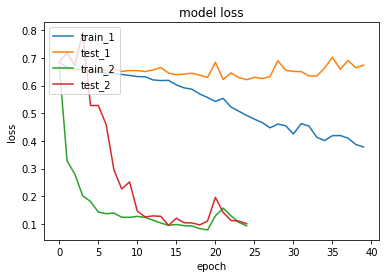

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_1', 'test_1','train_2', 'test_2'], loc='upper left')
plt.show()

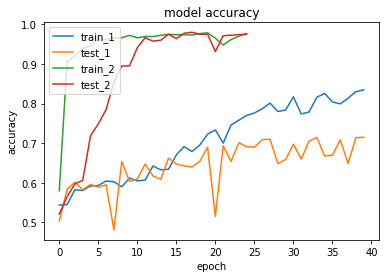

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_1', 'test_1','train_2', 'test_2'], loc='upper left')
plt.show()

In [78]:
test_loss, test_acc = convNN.evaluate(np.array(Xtest), np.array(Ytest))
print('Test accuracy:', test_acc)
Ypred_raw=convNN.predict(np.array(Xtest))
Ypred=np.argmax(Ypred_raw, axis=1)
Ytest_new=np.argmax(Ytest,axis=1)
cm = confusion_matrix(Ytest_new, Ypred)
print(cm)

test_loss2, test_acc2 = convNN2.evaluate(np.array(Xtest2), np.array(Ytest2))
print('Test accuracy:', test_acc2)
Ypred_raw2=convNN2.predict(np.array(Xtest2))
Ypred2=np.argmax(Ypred_raw2, axis=1)
Ytest_new2=np.argmax(Ytest2,axis=1)
cm2 = confusion_matrix(Ytest_new2, Ypred2)
print(cm2)

7/7 [==============================] - 0s 5ms/step - loss: 0.7863 - accuracy: 0.6850
Test accuracy: 0.6850000023841858
[[85 15]
 [48 52]]
7/7 [==============================] - 0s 10ms/step - loss: 0.1241 - accuracy: 0.9750
Test accuracy: 0.9750000238418579
[[96  4]
 [ 1 99]]
